In [0]:
# Mounting local drive directory
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [0]:
BASE_DIR = os.path.join('/content','drive','Team Drives','AppliedMLforSocialGood','ProjectData', 'Bike Safety')
BASE_DIR

COLLISION_DIR = os.path.join(BASE_DIR, 'CHP collision data')
collision_file = os.path.join(COLLISION_DIR, 'CollisionRecords.txt')
collision_file

FORD_DIR = os.path.join(BASE_DIR, 'Ford bike data')
ford_bike_file = os.path.join(FORD_DIR, 'sf_hourly_aggregated.csv')

#SAMPLE_SIZE = 1000



The columns in the Collision Records CSV file are the following:

CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,POPULATION,CNTY_CITY_LOC,SPECIAL_COND,BEAT_TYPE,CHP_BEAT_TYPE,CITY_DIVISION_LAPD,CHP_BEAT_CLASS,BEAT_NUMBER,PRIMARY_RD,SECONDARY_RD,DISTANCE,DIRECTION,INTERSECTION,WEATHER_1,WEATHER_2,STATE_HWY_IND,CALTRANS_COUNTY,CALTRANS_DISTRICT,STATE_ROUTE,ROUTE_SUFFIX,POSTMILE_PREFIX,POSTMILE,LOCATION_TYPE,RAMP_INTERSECTION,SIDE_OF_HWY,TOW_AWAY,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PARTY_COUNT,PRIMARY_COLL_FACTOR,PCF_CODE_OF_VIOL,PCF_VIOL_CATEGORY,PCF_VIOLATION,PCF_VIOL_SUBSECTION,HIT_AND_RUN,TYPE_OF_COLLISION,MVIW,PED_ACTION,ROAD_SURFACE,ROAD_COND_1,ROAD_COND_2,LIGHTING,CONTROL_DEVICE,CHP_ROAD_TYPE,PEDESTRIAN_ACCIDENT,BICYCLE_ACCIDENT,MOTORCYCLE_ACCIDENT,TRUCK_ACCIDENT,NOT_PRIVATE_PROPERTY,ALCOHOL_INVOLVED,STWD_VEHTYPE_AT_FAULT,CHP_VEHTYPE_AT_FAULT,COUNT_SEVERE_INJ,COUNT_VISIBLE_INJ,COUNT_COMPLAINT_PAIN,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE

In our case, we will use only the following pieces of information:

ACCIDENT_YEAR,PROC_DATE,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,POPULATION,CNTY_CITY_LOC,PRIMARY_RD,SECONDARY_RD,DISTANCE,DIRECTION,INTERSECTION,WEATHER_1,WEATHER_2,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,BICYCLE_ACCIDENT,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,LATITUDE,LONGITUDE

We will specifically focus on the columns that indicate a bycicle accident. These are indicated by the value "Y".

In [0]:
cols_string = 'ACCIDENT_YEAR,PROC_DATE,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,PRIMARY_RD,SECONDARY_RD,DISTANCE,DIRECTION,INTERSECTION,WEATHER_1,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,BICYCLE_ACCIDENT,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,LATITUDE,LONGITUDE'
cols_of_interest = cols_string.split(',')
cols_of_interest


['ACCIDENT_YEAR',
 'PROC_DATE',
 'COLLISION_DATE',
 'COLLISION_TIME',
 'DAY_OF_WEEK',
 'PRIMARY_RD',
 'SECONDARY_RD',
 'DISTANCE',
 'DIRECTION',
 'INTERSECTION',
 'WEATHER_1',
 'COLLISION_SEVERITY',
 'NUMBER_KILLED',
 'NUMBER_INJURED',
 'BICYCLE_ACCIDENT',
 'COUNT_BICYCLIST_KILLED',
 'COUNT_BICYCLIST_INJURED',
 'LATITUDE',
 'LONGITUDE']

This is the data for the bicycle collisions. 

In [0]:
collision_data = pd.read_csv(collision_file, usecols=cols_of_interest)
collision_data.shape

(15277, 19)

In [0]:
collision_data.sample(10)

,ACCIDENT_YEAR,PROC_DATE,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,PRIMARY_RD,SECONDARY_RD,DISTANCE,DIRECTION,INTERSECTION,WEATHER_1,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,BICYCLE_ACCIDENT,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,LATITUDE,LONGITUDE
10241,2018,20181002,20180811,1530,6,BOSWORTH ST,LYELL ST,0.0,NaN,Y,A,4,0,1,NaN,0,0,NaN,NaN
6642,2017,20171026,20170905,1240,2,I-80 W/B,WEST ROADWAY EDGE OF 3RD STREET U/C,175.0,W,N,A,4,0,1,NaN,0,0,37.78179,122.39701
13097,2018,20180820,20180810,1647,5,I-80 E/B,TREASURE ISLAND RD. O/C,600.0,W,N,A,0,0,0,NaN,0,0,37.80774,122.36770
1650,2017,20170512,20170420,1800,4,CALIFORNIA ST,32ND AV,54.0,W,N,A,0,0,0,NaN,0,0,NaN,NaN
15004,2019,20190220,20190217,1125,7,US-101 SOUTHBOUND TO I-80 EASTBOUND,DIVISION ST,70.0,S,N,B,0,0,0,NaN,0,0,37.76946,122.40555
10011,2018,20180927,20180808,2110,3,CESAR CHAVEZ,ALABAMA,0.0,NaN,Y,A,4,0,1,NaN,0,0,NaN,NaN
8125,2018,20180420,20180311,1206,7,PRESIDIO BL,PINE ST,7.0,N,N,A,4,0,1,NaN,0,0,NaN,NaN
9906,2018,20180829,20180722,2121,7,KING ST,BERRY ST,335.0,N,N,B,0,0,0,NaN,0,0,NaN,NaN
1447,2017,20170511,20170421,950,5,CESAR CHAVEZ ST,2200 CESAR CHAVEZ ST,85.0,E,N,A,3,0,1,NaN,0,0,NaN,NaN
114,2017,20170320,20170209,903,4,JUNIPERO SERRA BL,THOMAS MOORE WY,0.0,NaN,Y,C,0,0,0,NaN,0,0,NaN,NaN


Now we filter out the rows that didn't have a bicycle accident involved.

In [0]:
is_bike_accident = collision_data['BICYCLE_ACCIDENT'] == 'Y'

bike_collision_data = collision_data[is_bike_accident]
bike_collision_data.shape

(1302, 19)

In [0]:
# we confirm that all the accidents remaining involve bike collisions
bike_collision_data.sample(10)

,ACCIDENT_YEAR,PROC_DATE,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,PRIMARY_RD,SECONDARY_RD,DISTANCE,DIRECTION,INTERSECTION,WEATHER_1,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,BICYCLE_ACCIDENT,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,LATITUDE,LONGITUDE
1999,2017,20170619,20170519,1736,5,VALENCIA ST,CESAR CHAVEZ ST,0.0,NaN,Y,A,0,0,0,Y,0,0,NaN,NaN
13926,2019,20190227,20190102,814,3,MISSION ST,11TH ST,0.0,NaN,Y,A,4,0,1,Y,0,1,NaN,NaN
6270,2017,20170814,20170803,1130,4,GGB EAST SIDEWALK,GGB TOLL PLAZA,560.0,N,N,B,2,0,2,Y,0,1,37.80849,122.47671
399,2017,20170413,20170301,734,3,8TH ST,BRANNAN ST,0.0,NaN,Y,A,4,0,1,Y,0,1,NaN,NaN
3524,2017,20171019,20170912,1639,2,7TH AV,IRVING ST,0.0,NaN,Y,B,4,0,1,Y,0,1,NaN,NaN
8404,2018,20180612,20180408,915,7,22ND ST,VALENCIA ST,0.0,NaN,Y,A,4,0,1,Y,0,1,NaN,NaN
3465,2017,20171012,20170922,833,5,BAYSHORE BL,BAYSHORE BL 625,0.0,NaN,N,A,2,0,1,Y,0,1,NaN,NaN
1351,2017,20170413,20170302,1745,4,HOWARD ST,1ST ST,0.0,NaN,Y,A,4,0,1,Y,0,1,NaN,NaN
8237,2018,20180418,20180321,1830,3,WALLER ST,STANYAN ST,0.0,NaN,Y,A,3,0,1,Y,0,1,NaN,NaN
7531,2018,20180220,20180107,1127,7,9TH AV,IRVING ST,0.0,NaN,Y,B,3,0,1,Y,0,1,NaN,NaN


Now we take a look at the Ford bike data to see what it looks like.

In [0]:
SAMPLE_SIZE = 1000
ford_data = pd.read_csv(ford_bike_file)
ford_data.shape


(1036442, 6)

In [0]:
ford_data.sample(10)

,Unnamed: 0,date,hour,weekday,station_name,num_visits
452024,452024,2018-5-3,8,3,The Embarcadero at Steuart St,24
546765,546765,2018-7-13,9,4,4th St at Harrison St,18
1004959,1004959,2019-3-15,10,4,San Francisco Public Library (Grove St at Hyde...,6
427516,427516,2018-5-16,23,2,Market St at Franklin St,2
440840,440840,2018-5-9,15,2,Post St at Kearny St,2
111119,111119,2017-10-12,22,3,Golden Gate Ave at Polk St,4
555312,555312,2018-7-8,22,6,30th St at San Jose Ave,6
1010666,1010666,2019-3-12,23,1,8th St at Ringold St,2
114367,114367,2017-10-10,20,1,29th St at Church St,6
132168,132168,2017-9-28,16,3,16th St at Prosper St,6


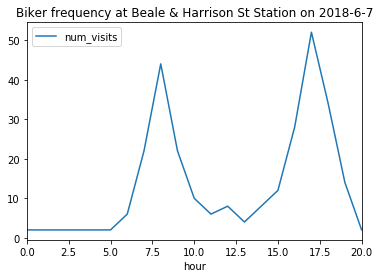

In [0]:
# randomly plot bike visits for one station in one day
# Beale St at Harrison St

beale_data = ford_data[ford_data['station_name'] == 'Beale St at Harrison St']
beale_data = beale_data[beale_data['date'] == '2018-6-7']
beale_data.shape

beale_data.plot(x='hour', y='num_visits',
                title='Biker frequency at Beale & Harrison St Station on 2018-6-7')

In [0]:
# convert the date to an appropriate pandas datetime format
ford_data['datehour'] = ford_data['date'].map(str) + ' ' + ford_data['hour'].map(str) + ':00:00'
ford_data['datehour'] = pd.to_datetime(ford_data.datehour)

ford_data.head(10)

,Unnamed: 0,date,hour,weekday,station_name,num_visits,datehour
0,0,2017-12-31,16,6,Laguna St at Hayes St,8,2017-12-31 16:00:00
1,1,2018-1-1,15,0,San Francisco Public Library (Grove St at Hyde...,12,2018-01-01 15:00:00
2,2,2017-12-31,15,6,Yerba Buena Center for the Arts (Howard St at ...,4,2017-12-31 15:00:00
3,3,2018-1-1,13,0,Dolores St at 15th St,2,2018-01-01 13:00:00
4,4,2017-12-31,17,6,8th St at Ringold St,4,2017-12-31 17:00:00
5,5,2018-1-1,10,0,Powell St BART Station (Market St at 5th St),4,2018-01-01 10:00:00
6,6,2017-12-31,22,6,San Francisco Caltrain (Townsend St at 4th St),16,2017-12-31 22:00:00
7,7,2018-1-1,1,0,San Francisco Caltrain (Townsend St at 4th St),8,2018-01-01 01:00:00
8,8,2017-12-31,23,6,Yerba Buena Center for the Arts (Howard St at ...,6,2017-12-31 23:00:00
9,9,2018-1-1,0,0,Yerba Buena Center for the Arts (Howard St at ...,2,2018-01-01 00:00:00


In [0]:
# sort the data by datehour
ford_data = ford_data.sort_values('datehour')

In [0]:
ford_data.head(10)

,Unnamed: 0,date,hour,weekday,station_name,num_visits,datehour
225931,225931,2017-6-28,9,2,Berry St at 4th St,2,2017-06-28 09:00:00
225939,225939,2017-6-28,9,2,Howard St at 2nd St,2,2017-06-28 09:00:00
225938,225938,2017-6-28,9,2,S Van Ness Ave at Market St,2,2017-06-28 09:00:00
225937,225937,2017-6-28,9,2,Market St at 10th St,2,2017-06-28 09:00:00
225936,225936,2017-6-28,9,2,2nd St at S Park St,4,2017-06-28 09:00:00
225935,225935,2017-6-28,9,2,Montgomery St BART Station (Market St at 2nd St),2,2017-06-28 09:00:00
225933,225933,2017-6-28,9,2,3rd St at Townsend St,2,2017-06-28 09:00:00
225932,225932,2017-6-28,9,2,The Embarcadero at Steuart St,2,2017-06-28 09:00:00
225930,225930,2017-6-28,9,2,San Francisco Ferry Building (Harry Bridges Pl...,2,2017-06-28 09:00:00
225916,225916,2017-6-28,10,2,The Embarcadero at Sansome St,2,2017-06-28 10:00:00


In [0]:
#ford_data[''], ford_data['month'], ford_data['day'] = ford_data['date'].str.split('-', 2).str
from datetime import timedelta

# want 24hrs data, one day
steps = 1
step_length = timedelta(steps)

first_day = ford_data['date'].iloc[0]
last_day = ford_data['date'].iloc[-1]


In [0]:
# LSTM
# Input: Future date (weekday can be calculated) and time (hour)
# Output: Vector of 175 values (indicating number of visits at each station at that particular time/date)

# Train Model on all data? 
# Use Case:
# Traffic forecasting - if I open google maps and route my path through SF, 
# based on the last month of data I should be able to get a rough prediction 
# of bike data in the next hour/time that I plan to drive through there. 

# Implementation Idea 1:
#     - Take all SF data from 2018 January
#     - Train model on January 2018
#     - Test model on random dates in Feburuary 2018
#     - See if predictions for Feburary match the recorded data for Feb 2018
#
# Data Reshaping: 
#     - [Date, Weekday, Hour, StationName0, ... , StationName174]
#     - Training_X is [Date, Weekday, Hour]
#     - Training_Y is [StationName0, ... StationName174]    (Number of visits at each station)

In [0]:
station_data=ford_data.pivot_table(values='num_visits', 
                                   index=['datehour'], 
                                   columns='station_name', aggfunc=np.sum)


# Here we select the minimum and maximum dates that we want to fill in
min_date = first_day
max_date = last_day

# we generate a date_range for our re-indexing
# frequency by hour
dates = pd.date_range(min_date, max_date, freq='1H')
new_index = pd.Index(dates, name="datehour")

# add new dates, sort, replace NaN with 0
station_data = station_data.reindex(new_index)
station_data = station_data.sort_values('datehour')

station_data = station_data.fillna(0)

#station_data.columns.values
#station_data

In [0]:
# Find highest traffic stations
nonzeros = (station_data != 0).sum(axis=0)   # Get number of nonzero entries in columns
nonzeros = np.array(nonzeros)

highest = [109, 134, 135, 45, 122, 58, 155, 145, 147, 68, 161, 153, 159, 31, 83, 144, 165, 130, 48, 162, 154, 44, 91, 10]
print(len(highest))
max_ = 0
id_ = ''
for idx in range(len(nonzeros)):
  if idx not in highest:
    if nonzeros[idx] > max_:
      max_ = nonzeros[idx]
      id_ = idx
    
print(id_)
station_data.columns.values[id_]
# REMEMBER TO REPLACE THE TRAINING PLOT WITH BEALE AND HARRISON

24
76


'Folsom St at 3rd St'

In [0]:
# Sandboxing LSTM

from sklearn.preprocessing import MinMaxScaler
from pandas import Series

d = station_data.describe()


# Use only 1 station for designing and testing the LSTM

label = station_data.columns.values[id_]
# 0, 2, 5 - 44 % training acc
# 7 = 49% training acc
# 8 = 48% train acc 
current = station_data[label]

current = pd.DataFrame(current[:-1])
current
len(current)
# January 2019 through end of March 2019
#current2019 = current[13248:-1]
# Dates are in order -> earlier to latest

15408

In [0]:
seq = np.array(current[label])
'''for i in range(len(seq)):
  print(i, seq[i])
print(label)'''
len(seq)

15408

In [0]:
# Aggregate by groups of 3 hours day
'''print(len(seq))
s = pd.DataFrame(seq)
s = s.groupby(s.index // 3).sum()
print(len(s))

s = np.array(s)
seq = []
for v in s:
  seq.append(v[0])
print(seq)'''
  
print(len(seq)) 

15408


In [0]:
series = Series(seq)
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize dataset
normalized = scaler.transform(values)
#print(normalized)
seq = normalized

# split into train and test sets
train_idx = int(len(seq) * 0.70)
validation_idx = int(len(seq) * 0.90)
train, validate, test = seq[0:train_idx], seq[train_idx:validation_idx], seq[validation_idx:len(seq)]
print(len(train), len(validate), len(test))

Min: 0.000000, Max: 62.000000
10785 3082 1541


In [0]:
# Sanity checks
#train[0:72]

scaler.inverse_transform(test)

array([[14.],
       [ 0.],
       [ 8.],
       ...,
       [ 4.],
       [ 2.],
       [ 8.]])

In [0]:
# Split such that we predict the next hour from the last n_steps
def split_sequence(sequence, n_steps):
	X, y = [], []
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return X, y

# learn from last N hours of active biker time 
n_steps = 24 # 
X_train, y_train = split_sequence(train, n_steps)
X_validate, y_validate = split_sequence(validate, n_steps)
X_test, y_test = split_sequence(test, n_steps)

#for i in range(len(X)):
  #print(X[i], y[i])
  
X_train = np.array(X_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
y_train = np.array(y_train)
y_train = y_train.reshape((y_train.shape[0], 1))

print(X_train.shape)
print(y_train.shape)

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0], 1))

print(X_test.shape)
print(y_test.shape)

X_validate = np.array(X_validate)
X_validate = X_validate.reshape((X_validate.shape[0], X_validate.shape[1], 1))
y_validate = np.array(y_validate)
y_validate = y_validate.reshape((y_validate.shape[0], 1))

print(X_validate.shape)
print(y_validate.shape)

#seq = seq.reshape((seq.shape[0], seq.shape[1], 1))


(10761, 24, 1)
(10761, 1)
(1517, 24, 1)
(1517, 1)
(3058, 24, 1)
(3058, 1)


In [0]:
X_train_temp = pd.DataFrame(X_train[:,:,0])
X_train_temp
print(X_train_temp.iloc[4])
print(y_train[4])
# y will be dependent on the X values (in order)

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.064516
8     0.129032
9     0.129032
10    0.000000
11    0.032258
12    0.064516
13    0.161290
14    0.096774
15    0.000000
16    0.000000
17    0.000000
18    0.032258
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: 4, dtype: float64
[0.]


In [0]:
n_features = 1

In [0]:
# Basic LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, GRU
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

checkpoint_dir = os.path.join('/content','drive','My Drive','Colab Notebooks','training_LSTM')
model_saved = checkpoint_dir + '/model-LSTM' + str(id_) + '.ckpt'
model_callback = ModelCheckpoint(model_saved, save_weights_only=True, verbose=1, period=10)
print(model_saved)

model = Sequential()
model.add(LSTM(24, input_shape=(n_steps, n_features), kernel_initializer="ones", bias_initializer='ones'))
#model.add(LSTM(16))
model.add(Dense(1))   # activation layer
model.add(Activation('sigmoid'))
model.compile(loss="mse", optimizer="adam", metrics=['mse'])

'''model = Sequential()
model.add(GRU(32, input_shape=(n_steps, n_features), kernel_initializer="random_uniform", bias_initializer='ones'))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])'''

model.summary()

Using TensorFlow backend.


/content/drive/My Drive/Colab Notebooks/training_LSTM/model-LSTM76.ckpt
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                2496      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validate, y_validate), batch_size=2, callbacks = [model_callback], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 10761 samples, validate on 3058 samples
Epoch 1/50
10761/10761 [==============================] - 64s 6ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 2/50
10761/10761 [==============================] - 62s 6ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 3/50
10761/10761 [==============================] - 63s 6ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 4/50
10761/10761 [==============================] - 63s 6ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 5/50
10761/10761 [==============================] - 61s 6ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 6/50
10761/10761 [==============================] - 64s 6ms/st

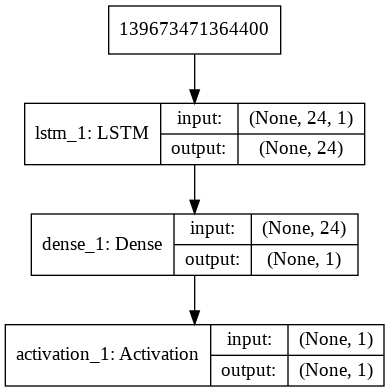

In [0]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

def show_model(model):
    plot_model(model, show_shapes=True, show_layer_names=True, to_file='temp_model.png')
    return Image(filename='temp_model.png')
  
show_model(model)

In [0]:
print(model.metrics_names)
trainScore = model.evaluate(X_train, y_train, batch_size=2, verbose=0)
print(trainScore)
testScore = model.evaluate(X_test, y_test, batch_size=2, verbose=0)
print(testScore)
print(id_)
print(station_data.columns.values[id_])


# 109 - Market St at 10th St
# [0.002062273089330662, 0.002062273089330662] train
# [0.010674108163201202, 0.010674108163201202] test
#
#
# 134 - Powell St BART Station (Market St at 4th St)
# [0.019313525852511632, 0.019313525852511632]
# [0.04542181637446189, 0.04542181637446189]
#
# 
# 135 - Powell St BART Station (Market St at 5th St)
# [0.0031712579713262527, 0.0031712579713262527]
# [0.008268373024021544, 0.008268373024021544]
#
# 45 - Berry St at 4th St  
# [0.0016706133297921856, 0.0016706133297921856]
# [0.00517451065383866, 0.00517451065383866]
#
#
# 122 - Montgomery St BART Station (Market St at 2nd St)
# [0.0017156134260478473, 0.0017156134260478473]
# [0.006473897651893874, 0.006473897651893874]
#
#
# 58 - Civic Center/UN Plaza BART Station (Market St at McAllister St)
# [0.004535284466939384, 0.004535284466939384]
# [0.012136456753653017, 0.012136456753653017]
#
#
# 155 - The Embarcadero at Sansome St
# [0.0035633843435845768, 0.0035633843435845768]
# [0.004639789763724625, 0.004639789763724625]
# The Embarcadero at Sansome St
#
#
#[0.001102431544716449, 0.001102431544716449]#
#[0.004415894134062518, 0.004415894134062518]
#145
#San Francisco Caltrain Station 2  (Townsend St at 4th St)
#
#
#
# 147 - San Francisco Ferry Building (Harry Bridges Plaza)
#[0.002793792870921105, 0.002793792870921105]
# [0.005899248997054549, 0.005899248997054549]
#
#
# 68 - Embarcardero BART Station (Beale St at Market St)
# [0.002169425312529655, 0.002169425312529655]
# [0.004650530659221573, 0.004650530659221573]
#
#
# 161 - Union Square (Powell St at Post St)
# [0.006481142364500244, 0.006481142364500244]
# [0.012958832885944783, 0.012958832885944783]
#
#
# 153 - Steuart St at Market St
# [0.0024730664946028434, 0.0024730664946028434]
# [0.004880408607764009, 0.004880408607764009]
# 
# 
# 159 - Townsend St at 7th St
# [0.002891886451019069, 0.002891886451019069]
# [0.005988647663529283, 0.005988647663529283]
#
#
# 31 - 3rd St at Townsend St
# [0.0014055264320152962, 0.0014055264320152962]
# [0.0025301400148102712, 0.0025301400148102712]
#
#
# 83 - Golden Gate Ave at Polk St
# [0.004627298250418345, 0.004627298250418345]
# [0.005298740235740634, 0.005298740235740634]
#
#
# 144 - San Francisco Caltrain (Townsend St at 4th St)
# [0.001981800487317894, 0.001981800487317894]
# [0.004334206667145384, 0.004334206667145384]
#
#
# 165 - Valencia St at 24th
# [0.005232382246614114, 0.005232382246614114]
# [0.008211507777906052, 0.008211507777906052]
#
#
# 130 - Post St at Kearny St
# [0.00465790580271993, 0.00465790580271993]
# [0.009941564045400591, 0.009941564045400591]
#
#
# 48 - Broadway at Kearny
# [0.005385339810488406, 0.005385339810488406]
# [0.010495234589730909, 0.010495234589730909]
#
#
# 162 - Valencia St at 16th St
# [0.00537691914179805, 0.00537691914179805]
# [0.008219995318537898, 0.008219995318537898]
#
#
# 154 - The Embarcadero at Bryant St
# [0.005508628992670247, 0.005508628992670247]
# [0.009924025046281197, 0.009924025046281197]
#
#
# 44 - Beale St at Harrison St
# [0.0023585019522990424, 0.0023585019522990424]
# [0.00936908849270449, 0.00936908849270449]
#
#
# 91 - Howard St at Beale St
# [0.0023160183072276496, 0.0023160183072276496]
# [0.004582747958480005, 0.004582747958480005]
#
#
# 10 - 17th St at Valencia St
# [0.003637479243204332, 0.003637479243204332]
# [0.008493439417051914, 0.008493439417051914]
#
#
# 76 - Folsom St at 3rd St
# [0.00425468069924329, 0.00425468069924329]
# [0.011789693833941337, 0.011789693833941337]


#test
#0.010674108163201202 + 0.04542181637446189 + 0.008268373024021544 + 0.00517451065383866 + 0.006473897651893874 + 0.012136456753653017 + 0.004639789763724625 +
#0.004415894134062518 + 0.005899248997054549 + 0.004650530659221573 + 0.012958832885944783 + 0.004880408607764009 + 0.005988647663529283 + 
#0.0025301400148102712 + 0.005298740235740634 + 0.004334206667145384 + 0.008211507777906052 + 0.009941564045400591 + 0.010495234589730909 + 
#0.008219995318537898 + 0.009924025046281197 + 0.00936908849270449 + 0.004582747958480005 + 0.008493439417051914 + 0.011789693833941337

#train
#0.002062273089330662 + 0.019313525852511632 + 0.0031712579713262527 + 0.0016706133297921856 + 0.0017156134260478473 + 0.004535284466939384 +
#0.0035633843435845768 + 0.001102431544716449 + 0.002793792870921105 + 0.002169425312529655 + 0.006481142364500244 + 0.0024730664946028434 + 
#0.002891886451019069 + 0.0014055264320152962 + 0.004627298250418345 + 0.001981800487317894 + 0.005232382246614114 + 0.00465790580271993 + 
#0.005385339810488406 + 0.00537691914179805 + 0.005508628992670247 + 0.0023585019522990424 + 0.0023160183072276496 + 0.003637479243204332 + 0.00425468069924329



['loss', 'mean_squared_error']
[0.00425468069924329, 0.00425468069924329]
[0.011789693833941337, 0.011789693833941337]
76
Folsom St at 3rd St


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


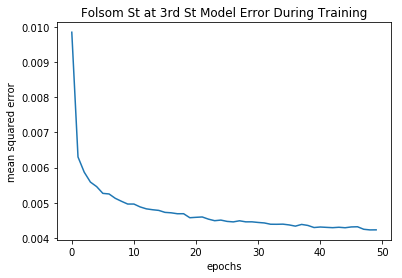

In [0]:
# plot mse
print(history.history.keys())
plt.plot(history.history['mean_squared_error'])
plt.title(station_data.columns.values[id_] + ' Model Error During Training')
plt.ylabel('mean squared error')
plt.xlabel('epochs')
plt.show()

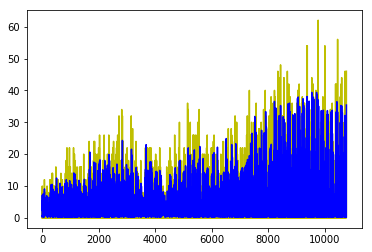

In [0]:
# invert scaler on results

training_predictions = model.predict(X_train)
training_predictions = scaler.inverse_transform(training_predictions)
training_y = scaler.inverse_transform(y_train.reshape(-1,1))

x_list = range(len(training_predictions))
plt.plot(x_list, training_y, 'y', x_list, training_predictions, 'b')

In [0]:
time_idx = pd.DataFrame(station_data.index[validation_idx+24:-1])
x_axis = time_idx.values

Text(0.5, 0, 'Date')

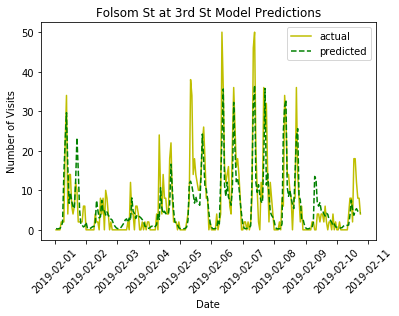

In [0]:
testing_predictions = model.predict(X_test)
testing_predictions = scaler.inverse_transform(testing_predictions)
testing_y = scaler.inverse_transform(y_test.reshape(-1,1))

x_list = range(len(testing_predictions))
days = 4
plt.plot(x_axis[6+(days*24):240+(days*24)], testing_y[6+(days*24):240+(days*24)], 'y', x_axis[6+(days*24):240+(days*24)], testing_predictions[6+(days*24):240+(days*24)], 'g--')
plt.legend(['actual', 'predicted'])
plt.title(station_data.columns.values[id_] + ' Model Predictions')
plt.xticks(rotation=45)
plt.ylabel('Number of Visits')
plt.xlabel('Date')

In [0]:
import os

predictions_dir = os.path.join('/content','drive','My Drive','Colab Notebooks','predictions_LSTM')
header = [station_data.columns.values[id_]]
int_predictions = [int(x) for x in testing_predictions]
predictions = pd.DataFrame(int_predictions, columns=header)
predictions.to_csv(predictions_dir + '/predictions_LSTM' + station_data.columns.values[id_] + '.csv')
#predictions.to_csv(predictions_dir + '/predictions_Civic Center BART Station (Market St at McAllister St).csv')

In [0]:
# Basic LSTM
import os
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, GRU
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

current_id = 144  # LOAD ALL DATA FOR THE ENTIRE NOTEBOOK USING THIS ID
n_steps = 24
n_features = 1
modelrestored = Sequential()
modelrestored.add(LSTM(24, input_shape=(n_steps, n_features), kernel_initializer="ones", bias_initializer='ones'))
modelrestored.add(Dense(1))   # activation layer
modelrestored.add(Activation('sigmoid'))
modelrestored.compile(loss="mse", optimizer="adam", metrics=['mse'])

saved_models_dir = os.path.join('/content', 'drive', 'My Drive', 'Colab Notebooks', 'training_LSTM')
model_load_from = saved_models_dir + '/model-LSTM' + str(current_id) + '.ckpt'
print(model_load_from)
modelrestored.load_weights(model_load_from)

/content/drive/My Drive/Colab Notebooks/training_LSTM/model-LSTM144.ckpt


In [0]:
print(modelrestored.metrics_names)
trainScore = modelrestored.evaluate(X_train, y_train, batch_size=2, verbose=0)
print(trainScore)
testScore = modelrestored.evaluate(X_test, y_test, batch_size=2, verbose=0)
print(testScore)

['loss', 'mean_squared_error']
[0.001981800487317894, 0.001981800487317894]
[0.004334206667145384, 0.004334206667145384]


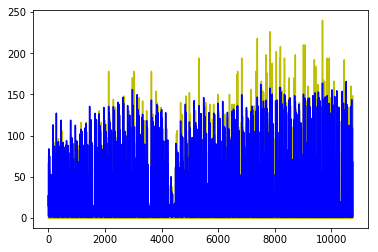

In [0]:
# invert scaler on results

model = modelrestored

training_predictions = model.predict(X_train)
training_predictions = scaler.inverse_transform(training_predictions)
training_y = scaler.inverse_transform(y_train.reshape(-1,1))

x_list = range(len(training_predictions))
plt.plot(x_list, training_y, 'y', x_list, training_predictions, 'b')

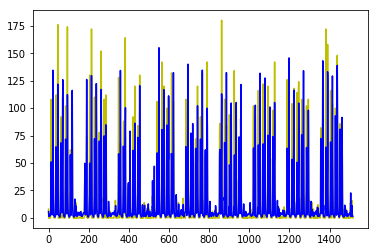

In [0]:
# invert scaler on results

testing_predictions = model.predict(X_test)
testing_predictions = scaler.inverse_transform(testing_predictions)
testing_y = scaler.inverse_transform(y_test.reshape(-1,1))

x_list = range(len(testing_predictions))
plt.plot(x_list, testing_y, 'y', x_list, testing_predictions, 'b')

In [0]:
time_idx = pd.DataFrame(station_data.index[validation_idx+24:-1])
x_axis = time_idx.values

234


Text(0.5, 0, 'Date')

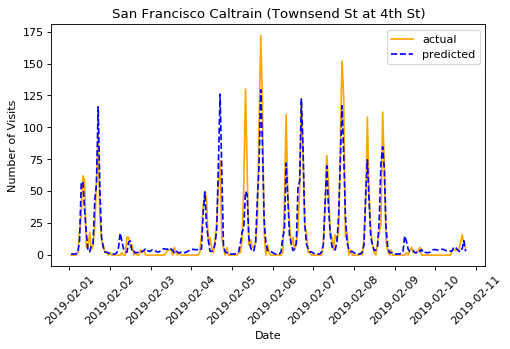

In [0]:
testing_predictions = modelrestored.predict(X_test)
testing_predictions = scaler.inverse_transform(testing_predictions)
testing_y = scaler.inverse_transform(y_test.reshape(-1,1))
fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

# Last 10 days: [-240:]
days = 4
x_list = range(len(testing_predictions[6+(days*24):240+(days*24)]))
print(len(x_list))
plt.plot(x_axis[6+(days*24):240+(days*24)], testing_y[6+(days*24):240+(days*24)], 'orange', linestyle="-")
plt.plot(x_axis[6+(days*24):240+(days*24)], testing_predictions[6+(days*24):240+(days*24)], 'b', linestyle="--")
plt.legend(['actual', 'predicted'])
plt.title(station_data.columns.values[current_id])
plt.xticks(rotation=45)
plt.ylabel('Number of Visits')
plt.xlabel('Date')

In [0]:

#test
#0.010674108163201202 + 0.04542181637446189 + 0.008268373024021544 + 0.00517451065383866 + 0.006473897651893874 + 0.012136456753653017 + 0.004639789763724625 +
#0.004415894134062518 + 0.005899248997054549 + 0.004650530659221573 + 0.012958832885944783 + 0.004880408607764009 + 0.005988647663529283 + 
#0.0025301400148102712 + 0.005298740235740634 + 0.004334206667145384 + 0.008211507777906052 + 0.009941564045400591 + 0.010495234589730909 + 
#0.008219995318537898 + 0.009924025046281197 + 0.00936908849270449 + 0.004582747958480005 + 0.008493439417051914 + 0.011789693833941337

#train
#0.002062273089330662 + 0.019313525852511632 + 0.0031712579713262527 + 0.0016706133297921856 + 0.0017156134260478473 + 0.004535284466939384 +
#0.0035633843435845768 + 0.001102431544716449 + 0.002793792870921105 + 0.002169425312529655 + 0.006481142364500244 + 0.0024730664946028434 + 
#0.002891886451019069 + 0.0014055264320152962 + 0.004627298250418345 + 0.001981800487317894 + 0.005232382246614114 + 0.00465790580271993 + 
#0.005385339810488406 + 0.00537691914179805 + 0.005508628992670247 + 0.0023585019522990424 + 0.0023160183072276496 + 0.003637479243204332 + 0.00425468069924329

import statistics

test_mse = [0.010674108163201202, 0.04542181637446189, 0.008268373024021544, 0.00517451065383866, 0.006473897651893874, 0.012136456753653017, 0.004639789763724625,
            0.004415894134062518, 0.005899248997054549, 0.004650530659221573, 0.012958832885944783, 0.004880408607764009, 0.005988647663529283, 0.0025301400148102712, 
            0.005298740235740634, 0.004334206667145384, 0.008211507777906052, 0.009941564045400591, 0.010495234589730909, 0.008219995318537898, 0.009924025046281197, 
            0.00936908849270449, 0.004582747958480005, 0.008493439417051914, 0.011789693833941337]
print(statistics.median(test_mse))



train_mse = [0.002062273089330662, 0.019313525852511632, 0.0031712579713262527, 0.0016706133297921856, 0.0017156134260478473, 0.004535284466939384, 
             0.0035633843435845768, 0.001102431544716449, 0.002793792870921105, 0.002169425312529655, 0.006481142364500244, 0.0024730664946028434, 
             0.002891886451019069, 0.0014055264320152962, 0.004627298250418345, 0.001981800487317894, 0.005232382246614114, 0.00465790580271993, 
             0.005385339810488406, 0.00537691914179805, 0.005508628992670247, 0.0023585019522990424, 0.0023160183072276496, 0.003637479243204332,
             0.00425468069924329]
print(statistics.median(train_mse))

0.008211507777906052
0.0031712579713262527
